# data process

mel

32000
Time: 382.302


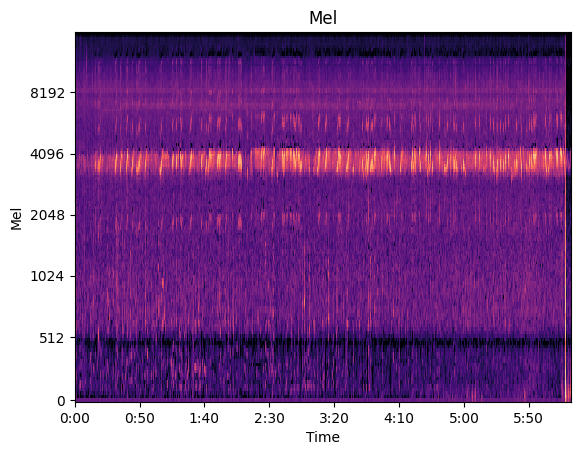

76
(128, 312)
21038


In [19]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

path ='./bird/train_audio/21038/iNat65519.ogg'
y,sr = librosa.load(path,sr=None,mono=False)
print(sr)
L = len(y)
print('Time:', L / sr)
length = 5* sr

mel = librosa.feature.melspectrogram(y=y, sr=sr,n_mels=128,n_fft=2048,hop_length=512)

db = librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(db, sr=sr, x_axis='time', y_axis='mel')
plt.ylabel('Mel')
plt.xlabel('Time')
plt.title('Mel')
plt.show() 

nums = int(L//length)

allData=[]
print(nums)
label="21038"
time = db.shape[1]/L
sl = int(length * time)
for i in range(nums):
    l = i * length
    r = l + length
    ls = int(l*time)
    rs = int(r*time)
    piece = db[:,ls:rs]
    allData.append((piece,label))

print(allData[0][0].shape)
print(allData[0][1])

In [ ]:
import os
import librosa
import numpy as np
import glob

path = './bird/train_audio'
data = {}

oggFiles = glob.glob(os.path.join(path, '**', '*.ogg'), recursive=True)
for oggfile in oggFiles:
    labelpaths = oggfile.split(os.sep)
    print(labelpaths)
    label = labelpaths[-2]
    file = labelpaths[-1]
    y,sr = librosa.load(oggfile,sr=None,mono=False)
    print(sr)
    L = len(y)
    print('Time:', L / sr)
    length = 5* sr
    mel = librosa.feature.melspectrogram(y=y, sr=sr,n_mels=128,n_fft=2048,hop_length=512)    
    db = librosa.power_to_db(mel, ref=np.max)
    # librosa.display.specshow(db, sr=sr, x_axis='time', y_axis='mel')
    # plt.ylabel('Mel')
    # plt.xlabel('Time')
    # plt.title('Mel')
    # plt.show() 
    nums = int(L//length)
    print(nums)
    time = db.shape[1]/L
    sl = int(length * time)
    for i in range(nums):
        l = i * length
        r = l + length
        ls = int(l*time)
        rs = int(r*time)
        piece = db[:,ls:rs]
        name=file+str(i)
        data[name] = {
            'data': piece,
            'label': label
        }
np.save("birddata.npy", data)


['./bird/train_audio', '1139490', 'CSA36385.ogg']
32000
Time: 98.853375
19
['./bird/train_audio', '1139490', 'CSA36389.ogg']
32000
Time: 96.53771875
19
['./bird/train_audio', '1192948', 'CSA36358.ogg']
32000
Time: 116.5998125
23
['./bird/train_audio', '1192948', 'CSA36366.ogg']
32000
Time: 105.4463125
21
['./bird/train_audio', '1192948', 'CSA36373.ogg']
32000
Time: 103.63146875
20
['./bird/train_audio', '1192948', 'CSA36388.ogg']
32000
Time: 96.07284375
19
['./bird/train_audio', '1194042', 'CSA18783.ogg']
32000
Time: 32.2718125
6
['./bird/train_audio', '1194042', 'CSA18794.ogg']
32000
Time: 13.493625
2
['./bird/train_audio', '1194042', 'CSA18802.ogg']
32000
Time: 46.04040625
9
['./bird/train_audio', '126247', 'iNat1109254.ogg']
32000
Time: 16.15646875
3
['./bird/train_audio', '126247', 'iNat146584.ogg']
32000
Time: 14.664
2
['./bird/train_audio', '126247', 'iNat320679.ogg']
32000
Time: 22.6626875
4
['./bird/train_audio', '126247', 'iNat888527.ogg']
32000
Time: 15.30196875
3
['./bird/tr

In [1]:
import os
import librosa
import numpy as np
import glob

path = './bird/train_audio'
size = 100 
sum = 0
batchCounter = 0
data = {}
oggFiles = glob.glob(os.path.join(path, '**', '*.ogg'), recursive=True)
total = len(oggFiles)
for oggfile in oggFiles:
    labelpaths = oggfile.split(os.sep)
    label = labelpaths[-2]
    file = labelpaths[-1]
    y, sr = librosa.load(oggfile, sr=None, mono=True)
    L = len(y)
    length = 5 * sr       
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, n_fft=2048, hop_length=512)    
    db = librosa.power_to_db(mel, ref=np.max)
    nums = int(L//length)
    time = db.shape[1]/L
    for i in range(nums):
        l = i * length
        r = l + length
        ls = int(l*time)
        rs = int(r*time)
        piece = db[:,ls:rs]
        name = file + str(i)
        data[name] = {'data': piece,'label': label}       
    sum += 1      
    if sum % size == 0 or sum == total:
        batchCounter += 1
        nameF = f"birddata{batchCounter}.npy"
        np.save(nameF, data)
        print(batchCounter,total)
        data = {}  
    
#每5s切片做一次取数据 取得的数据太多了


1 28564
2 28564
3 28564
4 28564
5 28564
6 28564
7 28564
8 28564
9 28564
10 28564
11 28564
12 28564
13 28564
14 28564
15 28564
16 28564
17 28564
18 28564
19 28564
20 28564
21 28564
22 28564
23 28564
24 28564
25 28564
26 28564
27 28564
28 28564
29 28564
30 28564
31 28564
32 28564
33 28564
34 28564
35 28564
36 28564
37 28564
38 28564
39 28564
40 28564
41 28564
42 28564
43 28564
44 28564
45 28564
46 28564
47 28564
48 28564
49 28564
50 28564
51 28564
52 28564
53 28564
54 28564
55 28564
56 28564
57 28564
58 28564
59 28564
60 28564
61 28564
62 28564
63 28564
64 28564
65 28564
66 28564
67 28564
68 28564
69 28564
70 28564
71 28564
72 28564
73 28564
74 28564
75 28564
76 28564
77 28564
78 28564
79 28564
80 28564
81 28564
82 28564
83 28564
84 28564
85 28564
86 28564
87 28564
88 28564
89 28564
90 28564
91 28564
92 28564
93 28564
94 28564
95 28564
96 28564
97 28564
98 28564
99 28564
100 28564
101 28564
102 28564
103 28564


KeyboardInterrupt: 

In [4]:


import os
import librosa
import numpy as np
import glob
import cv2
path = './bird/train_audio'
size = 100 
sum = 0
batchCounter = 0
data = {}
oggFiles = glob.glob(os.path.join(path, '**', '*.ogg'), recursive=True)
total = len(oggFiles)
print(total)
for oggfile in oggFiles:
    labelpaths = oggfile.split(os.sep)
    label = labelpaths[-2]
    file = labelpaths[-1]
    y, sr = librosa.load(oggfile, sr=None, mono=True)
    L = len(y)
    length = 5 * sr       


    if L >= length:
        start= max(0, L//2 - length//2)
        piece = y[start:start + length]
        mel = librosa.feature.melspectrogram(y=piece, sr=sr, n_mels=128, n_fft=2048, hop_length=512)
        db = librosa.power_to_db(mel, ref=np.max)
        db = cv2.resize(db, (256, 128))
        data[file] = {'data': db, 'label': label}
    else:
        mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, n_fft=2048, hop_length=512)
        db = librosa.power_to_db(mel, ref=np.max)
        db = cv2.resize(db, (256, 128))
        data[file] = {'data': db, 'label': label}

    sum += 1   
    print(sum)
np.save("birddata_all.npy", data)



   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 445.2 kB/s eta 0:01:29
   ---------------------------------------- 0.0/39.5 MB 281.8 kB/s eta 0:02:20
   ---------------------------------------- 0.1/39.5 MB 479.1 kB/s eta 0:01:23
   ---------------------------------------- 0.1/39.5 MB 554.9 kB/s eta 0:01:11
   ---------------------------------------- 0.3/39.5 MB 1.0 MB/s eta 0:00:38
   --- ------------------------------------ 3.4/39.5 MB 10.8 MB/s eta 0:00:04
   ------- -------------------------------- 7.8/39.5 MB 21.6 MB/s eta 0:00:02
   ------------ --------------------------- 12.2/39.5 MB 93.0 MB/s eta 0:00:01
   ---------------- ----------------------- 16.7/39.5 MB 93.0 MB/s eta 0:00:01
   --------------------- ------------------ 21.5/39.5 MB 93.0 MB/s eta 0:00:01
   -


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


28564
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

In [5]:

print(type(data))  
print(len(data))
keys = list(data.keys())
print(keys[:5])
print(keys[0])
print(data[keys[0]]['label'])
print(data[keys[0]]['data'].shape)
X = np.array([item['data'] for item in data.values()])  
y = np.array([item['label'] for item in data.values()]) 
print(X.shape)
print(len(y))

<class 'dict'>
28552
['CSA36385.ogg', 'CSA36389.ogg', 'CSA36358.ogg', 'CSA36366.ogg', 'CSA36373.ogg']
CSA36385.ogg
1139490
(128, 256)
(28552, 128, 256)
28552
